# Comparison evaluation
## MovieLens dataset

In [1]:
import utils.common
import evaluation
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [2]:
def get_colors(idx):
    jet = cm = plt.get_cmap('viridis') 
    cNorm  = colors.Normalize(vmin=0, vmax=max(idx) + 1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    return scalarMap.to_rgba(idx)

In [5]:
ml_car = pd.read_csv('../evals/Comp_ConstraintAutoRec_ML_pretrain.csv', index_col = 0)
ml_car['dataset'] = 'MovieLens'
ml_car['training_time'] = 87.0
ml_car.name = 'CAR'

msd_car = pd.read_csv('../evals/Comp_ConstraintAutoRec_MSD_comparison.csv', index_col = 0)
msd_car['dataset'] = 'MSD'
msd_car['training_time'] = 61.0
msd_car.name = 'CAR'

ml_nlr = pd.read_csv('../evals/Comp_NeuralLogicRec_comparison_ML.csv', index_col = 0)
ml_nlr['dataset'] = 'MovieLens'
ml_nlr['training_time'] = 546.0
ml_nlr.name = 'NLR'

ml_nlr_v2 = pd.read_csv('../evals/Comp_NeuralLogicRec_comp_ML_V2.csv', index_col = 0)
ml_nlr_v2['dataset'] = 'MovieLens'
ml_nlr_v2['training_time'] = 75.0
ml_nlr_v2.name = 'NLRV2'

msd_nlr = pd.read_csv('../evals/Comp_NeuralLogicRec_comparison_MSD.csv', index_col = 0)
msd_nlr['dataset'] = 'MSD'
msd_nlr['training_time'] = 335.0
msd_nlr.name = 'NLR'

ml_bpr = pd.read_csv('../evals/Comp_BPR_comparison_ml.csv', index_col = 0)
ml_bpr['dataset'] = 'MovieLens'
ml_bpr['training_time'] = 400.0
ml_bpr.name = 'BPR'

msd_bpr = pd.read_csv('../evals/Comp_BPR__comparison_msd.csv', index_col = 0)
msd_bpr['dataset'] = 'MSD'
msd_bpr['training_time'] = 300.0
msd_bpr.name = 'BPR'

ml_mf = pd.read_csv('../evals/Comp_MatrixFactorizationcomparison_ml.csv', index_col = 0)
ml_mf['dataset'] = 'MovieLens'
ml_mf['training_time'] = 18.0
ml_mf.name = 'MF'

msd_mf = pd.read_csv('../evals/Comp_MatrixFactorizationcomparison_msd.csv', index_col = 0)
msd_mf['dataset'] = 'MSD'
msd_mf['training_time'] = 10.0
msd_mf.name = 'MF'

In [6]:
comparison_trained = pd.concat([ml_car.tail(1), msd_car.tail(1), ml_nlr.tail(1), msd_nlr.tail(1), ml_bpr.tail(1), msd_bpr.tail(1), ml_mf.tail(1), msd_mf.tail(1)])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [7]:
comparison_trained = comparison_trained.set_index(['dataset', 'name'])

In [7]:
metrics = comparison_trained[['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5', 'coverage@10', 'training_time']].transpose()

In [8]:
print(metrics.MovieLens.to_latex(float_format = "%.3f", bold_rows=True))
metrics.MovieLens

\begin{tabular}{lrrrr}
\toprule
\textbf{name} &    CAR &     NLR &     BPR &     MF \\
\midrule
\textbf{map@1        } &  0.309 &   0.261 &   0.191 &  0.002 \\
\textbf{map@5        } &  0.183 &   0.155 &   0.109 &  0.001 \\
\textbf{map@10       } &  0.153 &   0.129 &   0.087 &  0.001 \\
\textbf{diversity@5  } &  0.118 &   0.121 &   0.123 &  0.190 \\
\textbf{diversity@10 } &  0.127 &   0.128 &   0.126 &  0.190 \\
\textbf{epc@5        } &  0.761 &   0.791 &   0.578 &  0.987 \\
\textbf{epc@10       } &  0.775 &   0.803 &   0.607 &  0.987 \\
\textbf{epd@5        } &  0.149 &   0.151 &   0.159 &  0.190 \\
\textbf{coverage@1   } &  0.059 &   0.114 &   0.008 &  0.468 \\
\textbf{coverage@5   } &  0.113 &   0.243 &   0.021 &  0.749 \\
\textbf{coverage@10  } &  0.153 &   0.334 &   0.032 &  0.850 \\
\textbf{training\_time} & 87.000 & 546.000 & 400.000 & 18.000 \\
\bottomrule
\end{tabular}



name,CAR,NLR,BPR,MF
map@1,0.308767,0.261037,0.191288,0.002451
map@5,0.182997,0.154556,0.109288,0.000971
map@10,0.153121,0.129286,0.087370,0.000696
diversity@5,0.118393,0.120715,0.123089,0.190216
diversity@10,0.127154,0.128313,0.126104,0.190284
epc@5,0.760686,0.790900,0.577950,0.987188
epc@10,0.775327,0.802562,0.607322,0.987129
epd@5,0.149411,0.150908,0.159331,0.189590
coverage@1,0.058569,0.113573,0.007899,0.467874
coverage@5,0.112802,0.242655,0.020615,0.748868


In [136]:
print(metrics.MSD.to_latex(float_format = "%.3f", bold_rows=True))
metrics.MSD

\begin{tabular}{lrrrr}
\toprule
\textbf{name} &    CAR &     NLR &     BPR &     MF \\
\midrule
\textbf{map@1        } &  0.162 &   0.067 &   0.131 &  0.002 \\
\textbf{map@5        } &  0.079 &   0.032 &   0.062 &  0.001 \\
\textbf{map@10       } &  0.062 &   0.025 &   0.047 &  0.001 \\
\textbf{diversity@5  } &  0.205 &   0.220 &   0.213 &  0.366 \\
\textbf{diversity@10 } &  0.215 &   0.227 &   0.217 &  0.365 \\
\textbf{epc@5        } &  0.921 &   0.944 &   0.900 &  0.989 \\
\textbf{epc@10       } &  0.928 &   0.948 &   0.907 &  0.989 \\
\textbf{epd@5        } &  0.271 &   0.278 &   0.274 &  0.356 \\
\textbf{coverage@1   } &  0.128 &   0.222 &   0.077 &  0.553 \\
\textbf{coverage@5   } &  0.284 &   0.458 &   0.167 &  0.829 \\
\textbf{coverage@10  } &  0.390 &   0.586 &   0.236 &  0.910 \\
\textbf{training\_time} & 61.000 & 335.000 & 300.000 & 10.000 \\
\bottomrule
\end{tabular}



name,CAR,NLR,BPR,MF
map@1,0.161739,0.067142,0.130741,0.001687
map@5,0.079463,0.032069,0.061779,0.000783
map@10,0.061788,0.025033,0.047200,0.000582
diversity@5,0.205441,0.220095,0.212522,0.365852
diversity@10,0.215461,0.227278,0.217385,0.365170
epc@5,0.920683,0.943701,0.900380,0.989411
epc@10,0.927633,0.947741,0.907220,0.989423
epd@5,0.270541,0.278485,0.273968,0.356366
coverage@1,0.127980,0.222288,0.077026,0.553337
coverage@5,0.284118,0.457837,0.166716,0.828516


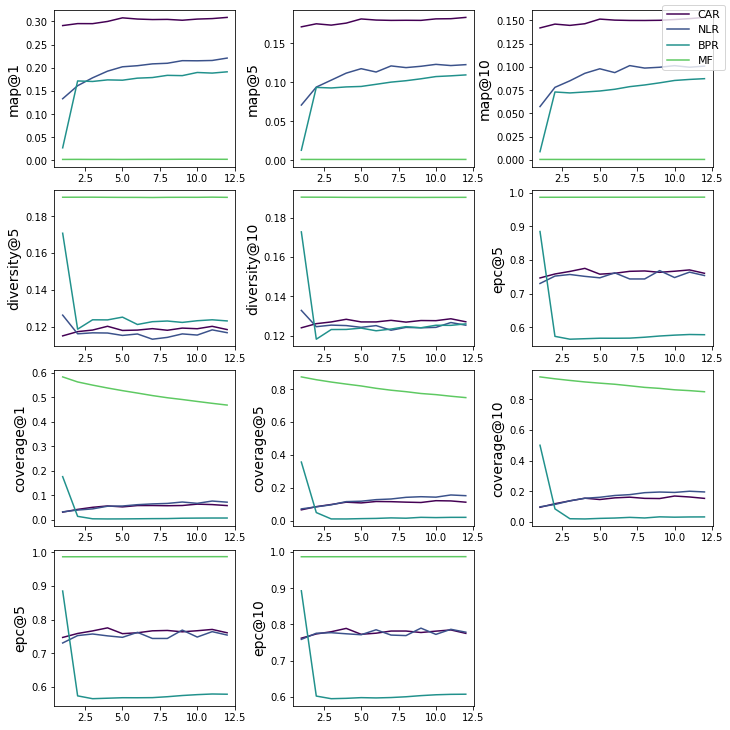

In [133]:
def plot_models(ax, models, prop):
    i = 0
    col = get_colors(range(len(models)))
    for m in models:
        ax.plot(m.index + 1, m[prop], color=col[i])   
        i = i + 1

data = [ml_car, ml_nlr, ml_bpr, ml_mf]
fig = plt.figure(figsize=(10,10))
i = 1
for prop in ['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'coverage@1', 'coverage@5', 'coverage@10', 'epc@5', 'epc@10']:
    ax1 = fig.add_subplot(4,3,i)
    ax1.set_ylabel(prop,  fontsize=14)
    plot_models(ax1, data, prop)
    i = i + 1
plt.tight_layout(pad=0.2, w_pad=0, h_pad=0.3)
fig.legend(['CAR', 'NLR', 'BPR', 'MF'], fontsize=11)
fig.savefig('../plots/Comparison_ML.pdf')

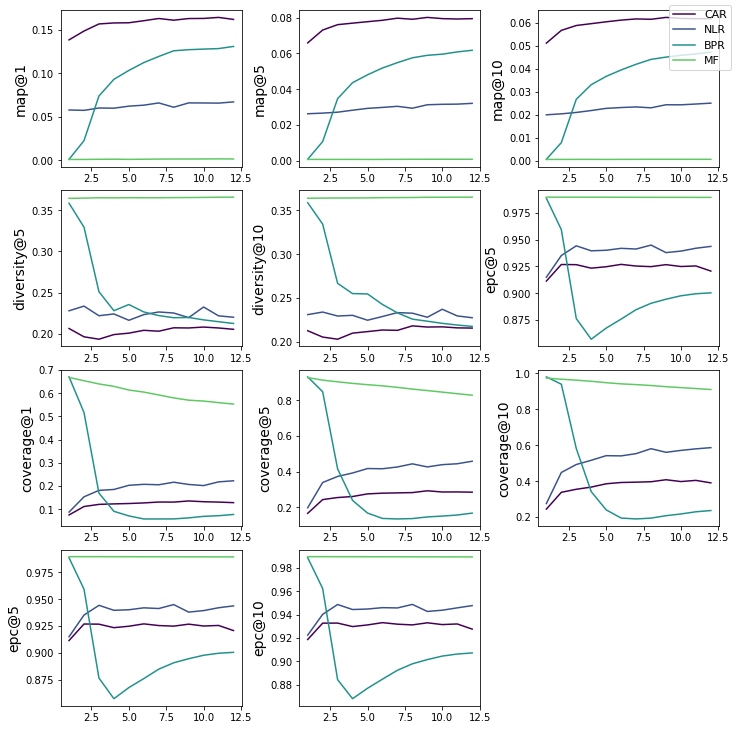

In [134]:
data = [msd_car, msd_nlr, msd_bpr, msd_mf]
fig = plt.figure(figsize=(10,10))
i = 1
for prop in ['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'coverage@1', 'coverage@5', 'coverage@10', 'epc@5', 'epc@10']:
    ax1 = fig.add_subplot(4,3,i)
    ax1.set_ylabel(prop,  fontsize=14)
    plot_models(ax1, data, prop)
    i = i + 1
plt.tight_layout(pad=0.2, w_pad=0, h_pad=0.3)
fig.legend(['CAR', 'NLR', 'BPR', 'MF'], fontsize=11)
fig.savefig('../plots/Comparison_MSD.pdf')

In [14]:
comp_nlr = pd.concat([ml_car.tail(1), ml_nlr.tail(1), ml_nlr_v2.tail(1)])
comp_nlr = comp_nlr.set_index(['dataset', 'name'])
metrics = comp_nlr[['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5', 'coverage@10']].transpose()
print(metrics.MovieLens)

name               CAR       NLR     NLRV2
map@1         0.308767  0.220950  0.258410
map@5         0.182997  0.122442  0.150113
map@10        0.153121  0.100815  0.123333
diversity@5   0.118393  0.116702  0.119592
diversity@10  0.127154  0.125416  0.126980
epc@5         0.760686  0.753959  0.790600
epc@10        0.775327  0.778599  0.802761
epd@5         0.149411  0.149893  0.151308
coverage@1    0.058569  0.072440  0.099123
coverage@5    0.112802  0.152394  0.204412
coverage@10   0.152972  0.195068  0.272806


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
